# 2021-2022 VERİ MADENCİLİĞİ DERSİ PROJESİ

# 1.PROBLEMİN AÇIKLAMASI
Kardiyovasküler hastalıklar (KVH), her yıl tahminen 17,9 milyon can alarak, dünya çapındaki tüm ölümlerin %31'ini oluşturan, küresel olarak 1 numaralı ölüm nedenidir. 5 kardiyovasküler hastalıktan dolayı ölümlerden dördü kalp krizi ve felç nedeniyledir ve bu ölümlerin üçte biri 70 yaşın altındaki kişilerde erken meydana gelir. Kalp yetmezliği, kardiyovsküler hastalıklarin neden olduğu yaygın bir olaydır ve bu veri seti, olası bir kalp hastalığını tahmin etmek için kullanılabilecek 11 özellik ve binary bağımsız değişken sonuç özelliği içerir.

Kardiyovasküler hastalığı olan veya yüksek kardiyovasküler risk altında olan kişiler (hipertansiyon, diyabet, hiperlipidemi veya halihazırda yerleşik hastalık gibi bir veya daha fazla risk faktörünün varlığı nedeniyle), bir makine öğrenimi modelinin çok yardımcı olabileceği erken tespit ve yönetime ihtiyaç duyar.

## VERİ SETİ HAKKINDA

Üzerinde çalışma yapılan veri seti, Kaggle'da bulunan https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset üzerinden elde edilmiştir.

#### Bağımsız Değişkenler
1. Age : Hastaların yaşı(yıl)
2. Sex : Hastanın cinsiyeti (1: Male, 0: Female)
3. cp : Göğüs ağrısı tipi (0: Belirgin Göğüs Ağrısı, 1: Belirgin olmayan(olası) göğüs ağrısı, 2: Anjinal olmayan göğüs ağrısı, 3: Semptomsuz)
4. trestbps : Dinlenme halinde kan basıncı(mm Hg)
5. Chol : Serum kolesterol(mm/dl)
6. Fbs : Açlık kan basıncı(1: Eğer FastingBS > 120 mg/dl, 0: Diğer)
7. restecg  : Dinlenme halinde elektrokardiyogram sonuçları ( 0: Normal ,1: ST-T dalgasında anormallik, 2: olası veya kesin sol ventriküler hipertropi 
8. thalach  : Ulaşılan maksimum kalp hızı
9. exang : Egzersize bağlı göğüs ağrısı (1: Yes, 0: No)
10. Oldpeak : Baskı altında ölçülen sayısal değer
11. slope : ST segmentinde zirve egzersiz durumunun eğimi(0-1-2)
12. ca : Büyük kılcal damar sayısı ( 0-1-2-3 )
13. thal :  1 = normal; 2 = düzeltilmiş kusur; 3 = tersine çevrilebilir kusur

#### Çıktı Değişkeni (Bağımlı Değişkenler)
14. HeartDisease (target) : Çıktı (1:Kalp Hastası ,0: Normal)

## ÖZET
Risk altında olan hastaların kalp hastalığı olup olmadığını, özelliklerine göre sınıflandıran bir verimiz var. Bu veri bilimi çalışmasında verileri, bir hastanın bu hastalığa sahip olup olmadığını tahmin etmeye çalışan bir model oluşturmak için kullanmaya çalışacağız. Lojistik Regresyon (sınıflandırma) ve Yapay Sinir Ağları algoritmalarını kullanacağız.

# 2.VERİ ÖNİŞLEME
## 2.1. VERİNİN İNCELENMESİ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from seaborn import heatmap
from sklearn import preprocessing

from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Grafikte daha anlamlı olması açısından target değişkenlerini 'Yes' ve 'No' olarak güncelliyoruz.

In [8]:
df.target = df.target.replace(1,"yes")
df.target = df.target.replace(0,"no")

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target       object
dtype: object

#### Burada sütun grafiği ile çıktı değişkenlerinin oranını karşılaştırıyoruz. Veri analizi yapmaya uygun şekilde dağılmış veriler olduğunu görüyoruz.

yes    526
no     499
Name: target, dtype: int64

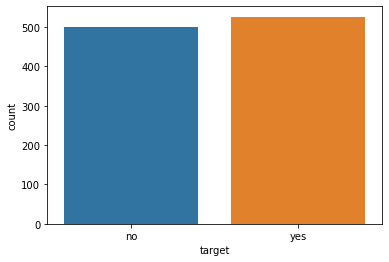

In [10]:
sns.countplot(x = "target", data = df)
df.loc[:,"target"].value_counts()

In [11]:
# Öznitelikleri Kategorik ve Sürekli olmak üzere ikiye ayırıyoruz. Böylece ifade edebileceğiz.
categorial = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
continuous = ["age","trestbps","chol","thalach","oldpeak"]
target = ["target"]

In [12]:
# Sürekli değişkenlerin ortalama, standart sapma, min ,max gibi değerleri incelenir.
df[continuous].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


## 2.2. VERİ GÖRSELLEŞTİRMESİ
### 2.2.1. Kategorik Verilerin Görselleştirilmesi
 Her bir kategorik veriye göre çıktı değişkenlerinin sütun grafiği çizilerek incelenir. Değişkenlerin sonucu nasıl etkilediği araştırılır.

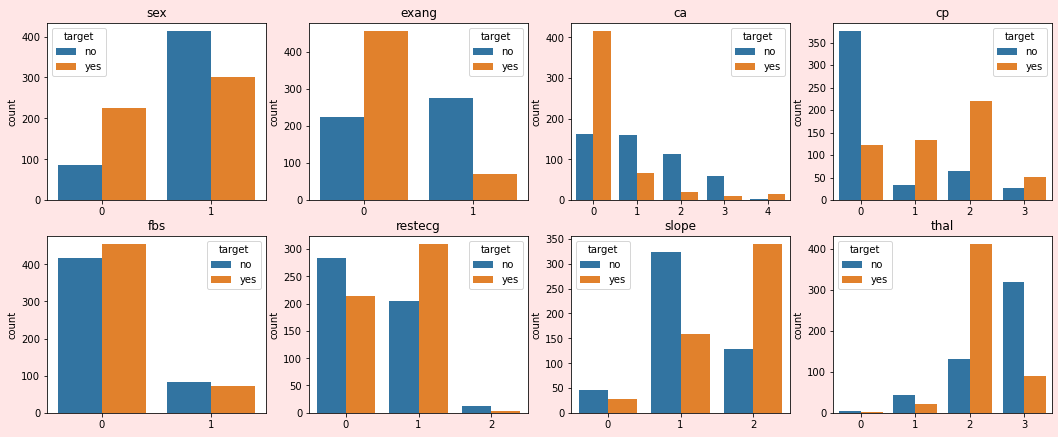

In [13]:
fig = plt.figure(figsize=(18,15))
fig.patch.set_facecolor("#ffe6e6")
for i, c in enumerate(categorial):
    plt.subplot(4,4,i+1)
    sns.countplot(df[c], hue=df["target"])
    plt.title(c)
    plt.xlabel("")

### 2.2.2. Verilerin Dağılımı
- Sürekli değişkenlerin olasılık yoğunluklarını görselleştirmek adına kdeplot fonksiyonu kullanılır. 
- Normal dağılıma uyup uymadığı ve verilerin yoğunluğu incelenir.

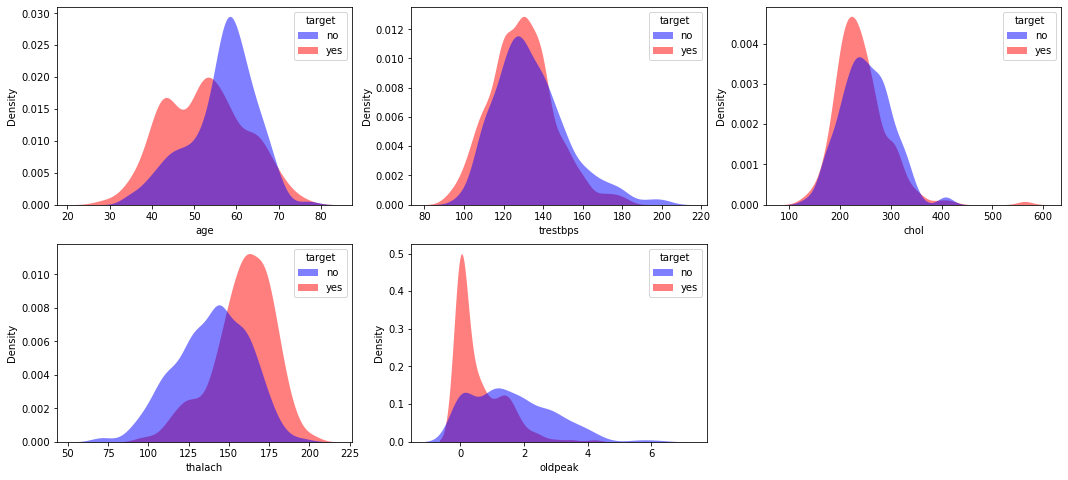

In [14]:
plt.figure(figsize=(18,8))
for i, c in enumerate(continuous):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data=df, x=df[c],hue="target", fill=True,palette=["blue","red"], alpha=.5, linewidth=0)

### 2.2.3. Aykırı Verilerin Tespiti
Aykırı değerlerin olduğu özniteliklerin belirlenmesi için boxplot fonksiyonu kullanılır. trestbps, chol,thalach, değişkenlerinde aykırı verilere rastlıyoruz.

In [16]:
fig = plt.figure(figsize=(18,15))
fig.patch.set_facecolor("#ffe6e6")
for i, c in enumerate(continuous):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = df[c])
    plt.title(c
    plt.xlabel("")

SyntaxError: invalid syntax (Temp/ipykernel_9364/1616131452.py, line 7)

## 2.3. AYKIRI VERİ ANALİZİ
Yukarıda boxplot ile tespit edilen aykırı verilerin değişkenleri ele alınarak 1.5 IQR üzerindeki veriler çıkartılır.

In [ ]:
Q1_age = df.age.quantile(0.25)
Q3_age = df.age.quantile(0.75)
IQR_age = Q3_age - Q1_age
IQR_age

In [ ]:
age_ust_sinir = Q3_age + 1.5 * IQR_age
age_alt_sinir = Q1_age - 1.5 * IQR_age
print("Age Alt Sınır" , age_alt_sinir)
print("Age Üst Sınır", age_ust_sinir)

In [ ]:
# Age'de aykırılık yoktur.
df.drop(df[(df.age > age_ust_sinir) & df.target].index, inplace=True)
df.drop(df[(df.age < age_alt_sinir) & df.target].index, inplace=True)
df.shape

In [ ]:
Q1_trestbps = df.trestbps.quantile(0.25)
Q3_trestbps = df.trestbps.quantile(0.75)
IQR_trestbps = Q3_trestbps - Q1_trestbps
IQR_trestbps

In [ ]:
trestbps_ust_sinir = Q3_trestbps + 1.5 * IQR_trestbps
trestbps_alt_sinir = Q1_trestbps - 1.5 * IQR_trestbps
print("trestbps Alt Sınır" , trestbps_alt_sinir)
print("trestbps Üst Sınır", trestbps_ust_sinir)

In [ ]:
# trestbps'de sadece üstsınırın üzerinde aykırılık var.
df.drop(df[(df.trestbps > trestbps_ust_sinir) & df.target].index, inplace=True)
df.drop(df[(df.trestbps < trestbps_alt_sinir) & df.target].index, inplace=True)
df.shape

In [ ]:
Q1_chol = df.chol.quantile(0.25)
Q3_chol = df.chol.quantile(0.75)
IQR_chol = Q3_chol - Q1_chol
IQR_chol

In [ ]:
chol_ust_sinir = Q3_chol + 1.5 * IQR_chol
chol_alt_sinir = Q1_chol - 1.5 * IQR_chol
print("chol Alt Sınır" , chol_alt_sinir)
print("chol Üst Sınır", chol_ust_sinir)

In [ ]:
# chol'de sadece üstsınırın üzerinde aykırılık var.
df.drop(df[(df.chol > chol_ust_sinir) & df.target].index, inplace=True)
df.drop(df[(df.chol < chol_alt_sinir) & df.target].index, inplace=True)
df.shape

In [ ]:
Q1_thalach = df.thalach.quantile(0.25)
Q3_thalach = df.thalach.quantile(0.75)
IQR_thalach = Q3_thalach - Q1_thalach
IQR_thalach

In [ ]:
thalach_ust_sinir = Q3_thalach + 1.5 * IQR_thalach
thalach_alt_sinir = Q1_thalach - 1.5 * IQR_thalach
print("thalach Alt Sınır" , thalach_alt_sinir)
print("thalach Üst Sınır", thalach_ust_sinir)

In [ ]:
#thalach'da sadece altsınırın altında aykırılık vardır.
df.drop(df[(df.thalach > thalach_ust_sinir) & df.target].index, inplace=True)
df.drop(df[(df.thalach < thalach_alt_sinir) & df.target].index, inplace=True)
df.shape

In [ ]:
Q1_oldpeak = df.oldpeak.quantile(0.25)
Q3_oldpeak = df.oldpeak.quantile(0.75)
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak
IQR_oldpeak

In [ ]:
oldpeak_ust_sinir = Q3_oldpeak + 1.5 * IQR_oldpeak
oldpeak_alt_sinir = Q1_oldpeak - 1.5 * IQR_oldpeak
print("oldpeak Alt Sınır" , oldpeak_alt_sinir)
print("oldpeak Üst Sınır", oldpeak_ust_sinir)

In [ ]:
# olpeak'de sadece üstsınırın üzerinde aykırılık vardır.
df.drop(df[(df.oldpeak > oldpeak_ust_sinir) & df.target].index, inplace=True)
df.drop(df[(df.oldpeak < oldpeak_alt_sinir) & df.target].index, inplace=True)
df.shape

In [ ]:
df.head()

## 2.4.KORELASYON ANALİZİ
Korelasyon analizi bağımsız değişkenleri ve bağımlı sonuç değişkeni arasındaki ilişkinin gücün için kullanılır. Korelasyon katsayısı değişkenlerin yönü ve etkileşimlerin nasıl olduğu hakkında bilgi verir. İki değişken arasındaki doğrusal ilişkinin ölçüsünü ifade eder ve pozitif veya negatif olabilir. Korelasyon aralığı değerleri de aşağıdaki tabloda bulunmaktadır.
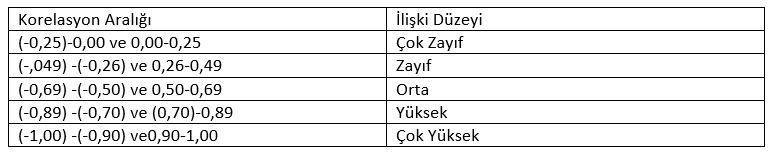


In [ ]:
df.target = df.target.replace("yes",1)
df.target = df.target.replace("no",0)

In [ ]:
print("Hedef Sütun 'target'dır.")
print("Age ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.age.corr(df.target)))
print("Sex ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.sex.corr(df.target)))
print("Cp ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.cp.corr(df.target)))
print("trestbps ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.trestbps.corr(df.target)))
print("chol ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.chol.corr(df.target)))
print("fbs ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.fbs.corr(df.target)))
print("restecg ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.restecg.corr(df.target)))
print("thalach ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.thalach.corr(df.target)))
print("exang ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.exang.corr(df.target)))
print("oldpeak ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.oldpeak.corr(df.target)))
print("slope ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.slope.corr(df.target)))
print("ca ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.ca.corr(df.target)))
print("thal ile hedef sütunumuz arasındaki korelasyon {}'dır.".format(df.thal.corr(df.target)))


### 2.4.1. Isı Haritası 

- Isı haritaları, matris tarzında verileri görselleştirmek için kullanılır. 
- Haritanın üst kısmı da aynı değerleri temsil edeceğinden maskelenir.

In [ ]:
# Üst üçgendeki değerleri True olarak ayarlamak için maskeyi tanımlıyoruz.
# matrisin üst üçgenini yalıtmak için np.triu() numpy işlevini  kullanalım. 
# np.ones_like() işlevinin kullanılması, tüm yalıtılmış değerleri 1'e değiştirecektir.
corr=df.corr()
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,mask=mask,fmt=".2f",annot=True)

### 2.4.2. Korelasyon Katsayısı Düşük Olanların Düşürülmesi
age,trestbps, chol, fbs,restecg korelasyon katsayıları yukarıdaki tabloda bulunan istediğimiz aralıkta olmadığından atarız. Ancak age değeri sınır değere yakın olduğu için bu sütunu atmamaya karar verdik.

In [ ]:
df.drop("trestbps", axis=1, inplace=True)
df.drop("chol", axis=1, inplace=True)
df.drop("restecg", axis=1, inplace=True)
df.drop("fbs", axis=1, inplace=True)

In [ ]:
# Korelasyon analizinde istenilen aralıkta olmadığı keşfedilip düşürülen verilerin 
# ardından veriler tekrar incelenir.
df.head()

### 2.4.3 Düşürülen Verilerden Sonra Isı Haritasının Çizilmesi

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,mask=mask,fmt=".2f",annot=True)

# 3.MAKİNA ÖĞRENMESİ

## 3.1. Lojistik Regresyon İle Test Edilmesi
Lojistik regresyon, bağımlı değişkenin iki veya daha fazla kategori içerdiği, bağımsız değişkenlerin ise sürekli veya kategorik bir yapıya sahip olduğu durumlarda bağımsız değişkenler ile bağımlı değişken arasındaki ilişkiyi araştırır. Bir sonucu belirleyen bir veya daha fazla bağımsız değişken bulunan bir veri kümesini analiz etmek için kullanılan istatistiksel bir yöntemdir. 

### 3.1.1. Test ve Eğitim Veri Setlerinin Oluşturulması
Veri setimizdeki önişleme adımlarını tamamladık ve verilerimizi testlere sokmak için test ve train diye bölüyoruz

In [ ]:
# Veri setimizi parçalayarak test verisi oluşturacağız.
# Verimizin 1/3 ünü test verisi olarak oluşturuyoruz 
# Yani 30 satırımızın 20 si train verisi olarak ayrılacak
# 10 satırımız da test verisi olacak.
x = df.drop("target",axis=1)
y = df["target"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=1/3, random_state= 20)

### 3.1.2. Standardlaştırma
Veri değerlerini standart bir formatta standart hale getirmek için StandardScaler işlevi kullanılır. Özelliklerin Ölçeklendirilmesi , algoritmaları veri kümeleriyle modellemede önemli bir adımdır. 
sts = StandardScaler()

In [ ]:
sts = StandardScaler()
scale = sts.fit(x_train)

In [ ]:
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

### 3.1.3. Doğruluk Ölçümü
Test ve eğitim veri setlerinin doğruluğu ölçülür.

In [ ]:
lambda_range = np.arange(0,1,0.01)
for lmb in lambda_range:
    LR = LogisticRegression(penalty = 'l2', C = lmb, multi_class="multinomial",random_state=20)
    LR.fit(x_train, y_train)
    print('lambda:', lmb)
    print('Özelliklerin katsayıları:', LR.coef_)
    print('Training accuracy:', LR.score(x_train, y_train))
    print('')

In [ ]:
# Yukarıdaki değerleri test edip en iyi sonucu ilk olarak 0.01 noktasında aldığımızı öğrenmiş olduk. 
# Bu sebeple C değerimizi 0.01 olarak aldık
#LogisticRegression nesnesi ile modelimizi oluşturuyoruz.
#Train verimiz ile de modelimizi besliyoruz.
LR = LogisticRegression(penalty = 'l2', C = 0.01,multi_class="multinomial",random_state=20)
LR.fit(x_train, y_train)

print('Özelliklerin katsayıları:', LR.coef_)
print('Training accuracy:', LR.score(x_train, y_train))
print('Test accuracy:', LR.score(x_test, y_test))

In [ ]:
#Test verimizle modelimize tahmin ürettiriyoruz.
y_pred = LR.predict(x_test)
y_pred

### 3.1.4. Lojistik Regresyon Modelinin Sonuçları

In [ ]:
# Kurulan bir sınıflandırma modelinin sonuçlarını yorumlayabilmek, gerçek ve tahmin edilen değerler 
# arasında yer alan ilişkideki hataları çapraz olarak inceleyebilmek için confusion matrix kullanılır.
plot_confusion_matrix(LR,x_test,y_test, display_labels=["yes","no"])

In [ ]:
print(classification_report(y_test,y_pred))

## 3.2.Yapay Sinir Ağları İle Test Edilmesi

Eğitilebilir, adaptif ve kendi kendine organize olup öğrenebilen ve değerlendirme yapabilen yapay sinir ağları ile insan beyninin öğrenme yapısı modellenmeye çalışılmaktadır. Makinelerin eğitilmesi, öğrenmesi ve karar vermesi amaçlanmaktadır. Gözetimli ve gözetimsiz olmak üzere iki farklı öğrenme özelliğine sahiptir.

### 3.2.1. Çok Katmanlı Yapay Sinir Ağları
Çok katmanlı yapay sinir ağları; girdi katmanı, gizli (hidden) katmanlar ve çıktı katmanlarından oluşmaktadır. Çok katmanlı yapay sinir ağları karmaşık problemlerin çözümünde kullanılmaktadır. 

In [ ]:
mlp_range = np.arange(10,200,10)
for mlp in mlp_range:
    MLP = MLPClassifier(hidden_layer_sizes=(mlp,), max_iter=mlp*100, random_state=20)
    MLP.fit(x_train,y_train)
    print('hidden_layer_size:',mlp , ', max_iter:',mlp*100)
    print('Training accuracy:', MLP.score(x_train, y_train))
    print("")

In [ ]:
# Yukarıdaki değerleri test edip en iyi sonucu ilk olarak 140,14000 noktasında aldığımızı öğrenmiş olduk. 
# Bu sebeple hidden_layer_size:140 max_iter:14000 olarak alırız.
MLP = MLPClassifier(hidden_layer_sizes=(140,),max_iter=14000,random_state=20)
MLP.fit(x_train,y_train)
print('Training accuracy:', MLP.score(x_train, y_train))
print("Test accurancy:", MLP.score(x_test,y_test))

### 3.2.2. Modeli Test Etme

In [ ]:
# Modelimizi eğitim verimiz ile eğittikten sonra test ediyoruz. 
# Pred içerisinde her bir test örneği için modelimizin tahminleri yer almaktadır.
pred = MLP.predict(x_test)
pred

### 3.2.3. Yapay Sinir Ağları Modelinin Sonuçları

In [ ]:
plot_confusion_matrix(MLP,x_test,y_test, display_labels=["yes","no"])

In [ ]:
print(classification_report(y_test,pred))

## 4. SONUÇ
Veri seti iki farklı algoritma ile teste tabi tutuldu. Lojistik Regresyona göre eğitim veri setinin doğruluğu % 86 ,  test veri setinin doğruluğu % 85 çıktı. Yapay sinir ağlarına göre ise eğitim veri setinin doğruluğu % 100 , test veri setinin doğruluğu % 99 çıktı.  Yapay sinir ağları ile veri seti öğrenmeyi daha iyi gerçekleştirdi diyebiliriz. 
                        
